## Sylvester Brown
## Regis University
## Praticum I
### Spring 2020

### Purpose of project:
Showcase skills in data manipulation and engineering, exploratory data analysis, visualizations
and Machine leaning.


### The problems to solve are:

1. what main characteristics contribute to the reason of why employees are leaving?

2. Which learning model appears to be better for predicting which employees will leave.

### About the Dataset:
The dataset belongs to William Walter. Data can be found at “https://www.kaggle.com/colara/human-resource”

### Other Resources used:

"Pandas for Everyone' by Daniel  Chen

https://www.kaggle.com/colara/human-resources-analytics-a-descriptive-analysis

https://www.kaggle.com/daphnecor/predict-employee-turnover-rate-0

https://www.kaggle.com/henryshtang/hr-data-exploration

https://www.kaggle.com/rhuebner/human-resources-data-set/kernels


### Import Libraries

In [1]:
# import numpy, pandas. seaborn and matplotlib

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Upload Data

In [2]:
# Use pandas to read the csv file

hr = pd.read_csv('C:/Users/spbro/OneDrive/Desktop/Human Resources.csv') 

### Eploratory Data Analysis

In [3]:
# List the column names for the dataset
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

A closer look at the column names shows that some of the colums are not descriptive enough to help the analyst know what the column contains. For this reason the "Sales" column will need to be changed to "departments" and "average_montly_hours" will be changed to "average_monthly_hours". "Work_accidents" change to "work_accidents", "time_spend_company" to "time_spent_at_company", "number_project" to "number_of_projects"

In [4]:
# use rename() to change column names

hr = hr.rename(columns = {'sales':'department'})
hr = hr.rename(columns = {'average_montly_hours':'average_monthly_hours'})
hr = hr.rename(columns = {'Work_accidents':'work_accident'})
hr = hr.rename(columns = {'time_spend_company':'time_spent_at_company'})
hr = hr.rename(columns = {'number_project':'number_of_projects'})

In [5]:
# Display first 5 rows

hr.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Display last 5 rows

hr.tail()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
hr.shape

# There are 14999 rows and 10 columns

(14999, 10)

In [8]:
# A statistical description of each column

hr.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# check if data contains any null values

hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_of_projects       False
average_monthly_hours    False
time_spent_at_company    False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [10]:
# display more descriptive stats using .info()
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_of_projects       14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spent_at_company    14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
# display unique values of hr['salary']

hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:

5# Convert salary variable type to numeric
hr['salary'] = hr['salary'].map({'low':1, 'medium':2, 'high':3})

hr['salary'].unique()

array([1, 2, 3], dtype=int64)

In [13]:
# display unique values of hr['department']
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
#numpy.where(condition[, x, y])
#Return elements, either from x or y, depending on condition.

# change 'support' category to 'technical' category
hr['department'] = np.where(hr['department'] == 'support', 'technical', hr['department'])

# change 'IT' in 'technical'category'
hr['department'] = np.where(hr['department'] == 'IT' , 'technical', hr['department'])

hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

explore the number of employees that left the company versus those that did not leave using count and groupby

In [15]:
# how many people left the company using count

hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
# (3571/14999)*100 = 23.808% This indicated that about 24% of the employees 
# left the company


In [17]:
# Use groupby to explore those who left per each cloumn using mean values

hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


## Observations

* The average satisfaction level of employees who stayed with the company is higher (66%) than that of the employees who left(44%).

* The average monthly work hours of employees who left the company is more than that of the employees who stayed. The average hours worked per month of those who left the company was 207.4hrs and those who stayed was about 199hrs.

* The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.

* The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

* On face value, it appears there was no significant different in the mean between those who left and those who did not leave when it comes to 'last_evaluations' and 'number of projects'

* The average number of people who stayed because of salary was higher than those whose left.

In [18]:
# Use groupby to explore the data using department

hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,1.602287
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,1.629726
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,1.607578
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,2.071429
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,1.624709
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,1.575388
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,1.557971
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258,1.562500


## Observations

* Management department had the most satisfaction level

* The department with the highest average of people who left was hr and management had the least.

* the satisfaction level for hr was about 59%. Accounting has the lowest average satisfaction level at about 58%. 

* It can be observed that satisfaction level may not be the only criteria for leaving, given that accounting did not become the department with the most number of people who left seeing that their satisfaction level was the lowest in the company. In other words, other tools like correlation analysis may have to be used to estimate what combinations of factors may be a better predictor of does who left the company.

In [19]:
# Use groupby to explore the data using salary

hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
1,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
2,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079
3,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205


## Observations

* Given that 1 is low salary and 3 is for high salary, it appears that those with the high salary are usually the most satisfied as well.

* Those with the high salary appear to also have teh lowest average of people who left.


## Additional Questions that can be answered through more EDA

In [20]:
# How many employees work in each department?

hr['department'].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [21]:
# How many emplpoyes per Salary range?

hr['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [22]:
# How many employees per salary range and department?

table = hr.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)

table

salary,1,2,3
department,,,
RandD,364.0,372.0,51.0
accounting,358.0,335.0,74.0
hr,335.0,359.0,45.0
management,180.0,225.0,225.0
marketing,402.0,376.0,80.0
product_mng,451.0,383.0,68.0
sales,2099.0,1772.0,269.0
technical,3127.0,2624.0,425.0


## Data Visualization

### BOXPLOTS

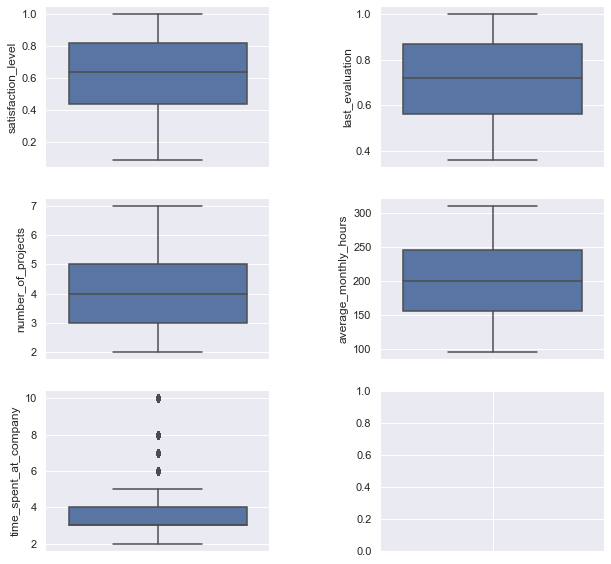

In [23]:
f, axes = plt.subplots(3,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5) # adjust the space between the plots

sns.despine(left=True)

# plot a boxplot of satisfaction_level to see if there is outliers
sns.boxplot( x= 'satisfaction_level',  data=hr, orient='v',ax=axes[0,0])

# plot a boxplot of last_evaluation to see if there is outliers
sns.boxplot( x= 'last_evaluation',  data=hr, orient='v',ax=axes[0,1])

# plot a boxplot of number_project to see if there is outliers
sns.boxplot( x= 'number_of_projects',  data=hr, orient='v',ax=axes[1,0])

# plot a boxplot of average_montly_hours to see if there is outliers
sns.boxplot( x= 'average_monthly_hours',  data=hr, orient='v',ax=axes[1,1])

# plot a boxplot of time_spent_at_company to see if there is outliers
sns.boxplot( x= 'time_spent_at_company',  data=hr, orient='v',ax=axes[2,0])

##  Observation
Time spent at the company has outliers. The company also appears to be a young company.

## BAR PLOT

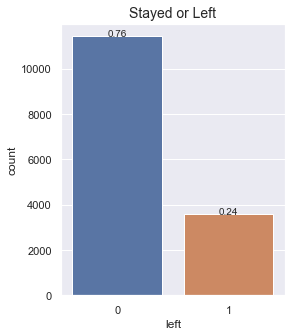

In [24]:
# The plot shows the amount of employees that stayed and left the company.

plt.figure(figsize=(4,5))
ax = sns.countplot(hr.left)
total = float(len(hr))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Stayed or Left', fontsize=14);

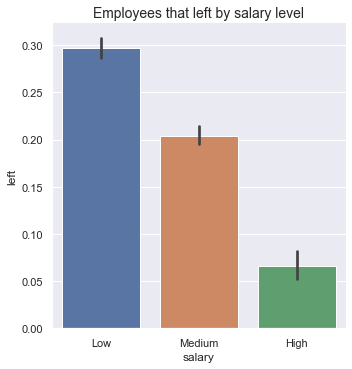

In [25]:
# plot of Employees that left by Salary level

j = sns.catplot(x='salary', y='left', kind='bar', data=hr)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['Low', 'Medium', 'High'])

Text(0.5, 1, 'Employees that left by work_accidents')

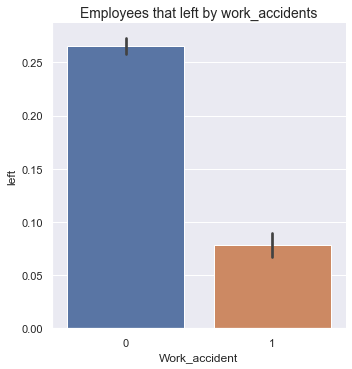

In [26]:
# plot of Employees that left by Salary level

j = sns.catplot(x='Work_accident', y='left', kind='bar', data=hr)
plt.title('Employees that left by work_accidents', fontsize=14)

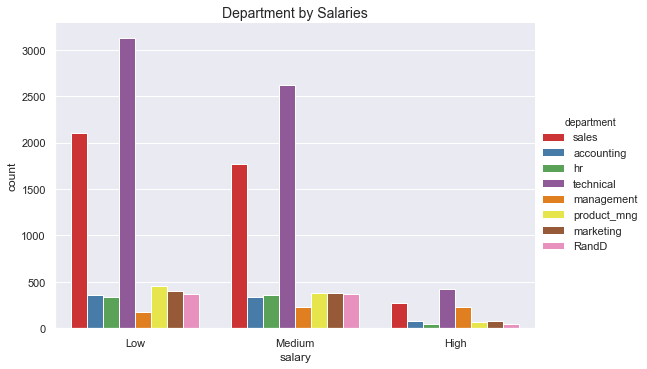

In [27]:
# plot of departments by salary level

h = sns.catplot(x = 'salary', hue='department', kind ='count', height = 5,aspect=1.5, data=hr, palette='Set1' )
plt.title("Department by Salaries", fontsize=14)
h.set_xticklabels(['Low', 'Medium', 'High']);

## OBSERVATION

* Most of the employees of the technical department have low or medium salaries.

* Sales department is in the second place where most of the employees receives low and medium salaries.

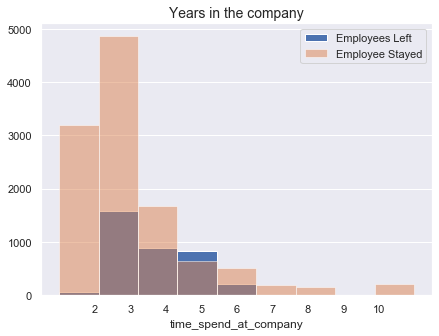

In [28]:
# Plot comparing employees that left with years in company

plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(hr[hr['left']==1]['time_spent_at_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(hr[hr['left']==0]['time_spent_at_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_at_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

## OBSERVATION

* Employees with 7 or more years did not leave.

* In year 1, new hires hardly leave the company, if they do the number is very low. The problem starts when the employees have more than 3 years and get worst when they achieve 5 years.

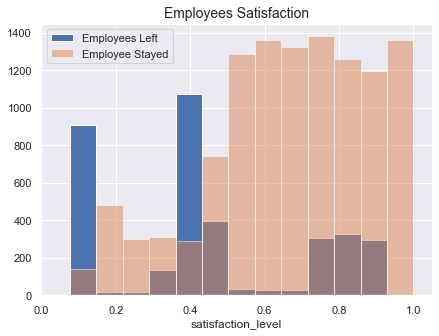

In [29]:
# Plot comparing employees that left with satisfaction

plt.figure(figsize =(7,5))
bins = np.linspace(0.006,1.000, 15)
plt.hist(hr[hr['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(hr[hr['left']==0]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

## OBSERVATION

* We have a peak at about 0.1 satisfaction level. These are employees who are totally disappointed.

* Another peak at 0.4 satsfaction level, representing another group with the satisfaction level below the average.

* And another amount in the range 0.7 and 0.9, with employees that left, although the high satisfaction.

## LINE CHART

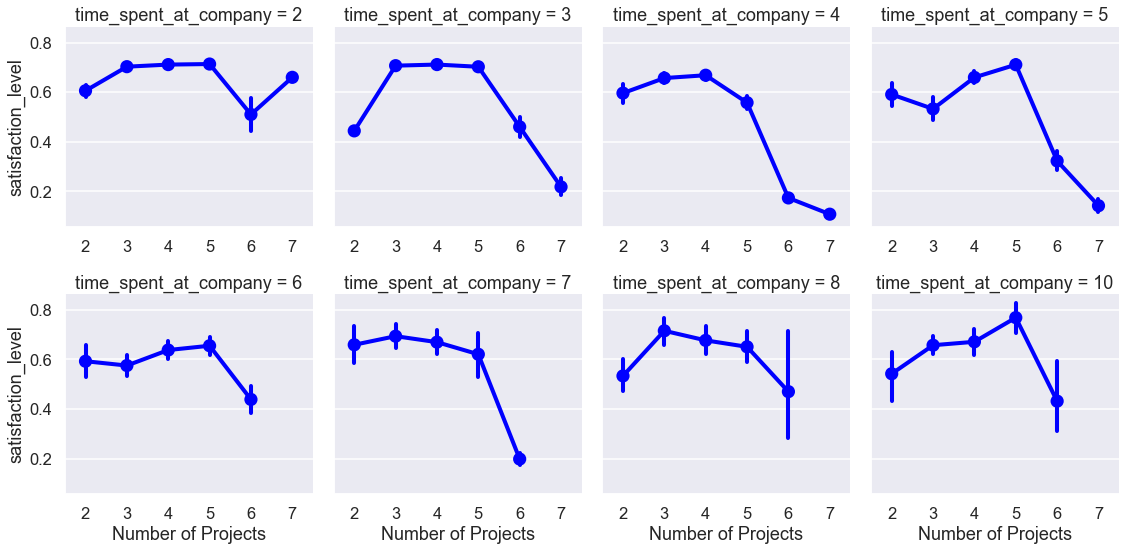

In [45]:
sns.set()
sns.set_context("talk")
ax = sns.factorplot(x="number_of_projects", y="satisfaction_level", col="time_spent_at_company",col_wrap=4, height=4, color='blue',sharex=False, data=hr)
ax.set_xlabels('Number of Projects')

## OBSERVATION

It appears clear that there is a drop in satisfaction when employees are working on 6 or more projects.

## Summary of the Exploratory Data Analysis

* It is a relatively young company, on average, employees have 3 or 4 years in the company and the oldest employee has been working there for 10 years.

* In five years only 2% of the employees were promoted. Is possible that many employees get unmotivated and start planning to leave.

* Employees with 7 or more years in the company did not left. Employees with 5 years have a greater chance to leaving. Management may have to plan an incentive package to retain emplopyees who work for five years.

* The employees with 4 years in the company have the lowest average satisfaction level of all the company with (0.47).

* The satisfaction drops when the employees are working on 5 or more projects. A number of 3 or 4 projects seems to be ideal independent of the time spent in the company.

## MACHINE LEARNING



Now we have to predict who will leave the company

In [31]:
#sklearn libraries needed for machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Train-Test split
y = hr['left']
X = hr.drop(['left','department'], axis=1)

X.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [34]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [35]:
#Logistic Regression
logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)


Training score:  0.7904562339270407
Testing score:  0.7857777777777778


In [36]:
# Accuracy Maxtix
pred=logis.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.7857777777777778
[[3183  246]
 [ 718  353]]


In [37]:
# display table of correlation for each column
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Features']
coeff_df["Correlation"] = pd.Series(logis.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Features,Correlation
4,time_spent_at_company,0.370398
3,average_monthly_hours,0.219374
1,last_evaluation,0.157843
6,promotion_last_5years,-0.195991
2,number_of_projects,-0.385212
7,salary,-0.440508
5,Work_accident,-0.554016
0,satisfaction_level,-1.027387


In [38]:
#decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.9755555555555555


In [39]:
#decision tree
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9978093151728736
Testing score:  0.9877777777777778


In [40]:
#kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score_train = knn.score(X_train, y_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(X_test, y_test)
print("Testing score: ",knn_score_test)

Training score:  0.9723783217449281
Testing score:  0.9568888888888889


In [41]:
#SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

Training score:  0.9665682445947233
Testing score:  0.9617777777777777


In [42]:
#random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score_train = rfc.score(X_train, y_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(X_test, y_test)
print("Testing score: ",rfc_score_test)

Training score:  0.9982855510048576
Testing score:  0.9897777777777778


In [43]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_score_train, dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
4,Random Forest,0.998286,0.989778
3,Decision Tree,0.997809,0.987778
1,SVM,0.966568,0.961778
2,kNN,0.972378,0.956889
0,Logistic Regression,0.790456,0.785778


## Recommendations

* Satisfaction level is the major impact on whether employees stay or leave the company. 
* Improve work life balance by having the right number of projects. Employees with 3-4 projects assigned tend to stay. Similarly, number of average hours a month plays a role in employees leaving or staying.  
* Provide training so that their evaluation score can improve. The data shows that employees with a low evaluation score are likely to leave.